In [38]:
!pip install annoy
!pip install fasttext
import numpy as np
import pandas as pd

from annoy import AnnoyIndex
import random
import fasttext
import nltk 

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def preprocess_text(sentence):

  words = sentence.split()

  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in words]
  stripped = [ word.lower() for word in stripped ]

  stop_words = set(stopwords.words('english'))
  words = [w for w in stripped if not w in stop_words]
  return " ".join(words)

def sentence_vector(model, sentence):
  text = preprocess_text(sentence).split()
  vec = [0]*100
  for i in range(len(text)):
    if(text[i] in model):
      vec+=model[text[i]]
  for i in range(len(vec)):
    vec[i]/= len(text)
  
  return vec

# English

## Nearest Neighbours

In [40]:

datafile = "/content/drive/MyDrive/Colab Notebooks/Filtered EnglishData (text_only).csv"

data = pd.read_csv(datafile)


data['is_retweet'] = data.full_text.apply(lambda x: x[:2]=='RT')
# print(len(data))
data=data[data['is_retweet']==False]
# print(len(data))
corpus = ""
import string

for i in data['full_text']:

  corpus+= " " + preprocess_text(i)

with open("/content/drive/MyDrive/Colab Notebooks/Filtered EnglishData (text_only).txt",'w') as f:
  f.write(corpus)

In [41]:
model = fasttext.train_unsupervised('/content/drive/MyDrive/Colab Notebooks/Filtered EnglishData (text_only).txt', model='skipgram')

In [42]:

data = data.reset_index(drop=True)

f = 100
t = AnnoyIndex(f, 'angular') 
for i in range(len(data)):
    v=sentence_vector(model,data['full_text'][i])
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

u = AnnoyIndex(f, 'angular')
u.load('test.ann') 


True

In [ ]:
index = 1
threshold = 0.2

neighs,dist = u.get_nns_by_item(index,1000, include_distances=True)
neighs=data['full_text'][neighs].values

for i in range(1000):
  if dist[i]>threshold:
    break
  print(i,": __________________________________________________________")
  print(neighs[i])
  print("###################################################")
  print(dist[i])
  print("______________________________________________________________")

## Visualisation

In [44]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [45]:

X=[]

for i in range(len(data)):
  X.append(sentence_vector(model,data['full_text'][i]))


In [46]:
X_np = np.array(X)
for i in range(100):
  minn = np.min(X_np[:,i])
  X_np[:,i]-=minn
  maxx = np.max(X_np[:,i])
  X_np[:,i]/=maxx

In [47]:
X_transformed = TSNE(n_components=2).fit_transform(X_np)
# print(X_transformed)

In [48]:
db = DBSCAN(eps=4.5,min_samples=90)
db.fit(X_transformed)

DBSCAN(algorithm='auto', eps=4.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=90, n_jobs=None, p=None)

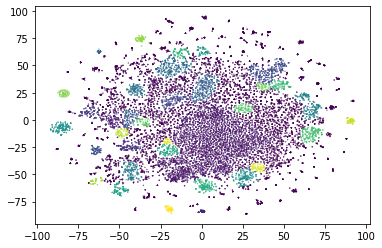

In [49]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], s=0.1, c=db.labels_)


# Hindi

## Nearest Neighbours

In [50]:

datafile = "/content/drive/MyDrive/Colab Notebooks/Filtered HindiData (text_only).csv"

data = pd.read_csv(datafile)


data['is_retweet'] = data.full_text.apply(lambda x: x[:2]=='RT')

data=data[data['is_retweet']==False]

corpus = ""
import string

for i in data['full_text']:

  corpus+= " " + preprocess_text(i)

with open("/content/drive/MyDrive/Colab Notebooks/Filtered HindiData (text_only).txt",'w') as f:
  f.write(corpus)

In [51]:
model = fasttext.train_unsupervised('/content/drive/MyDrive/Colab Notebooks/Filtered HindiData (text_only).txt', model='skipgram')

In [52]:

data = data.reset_index(drop=True)

f = 100
t = AnnoyIndex(f, 'angular') 
for i in range(len(data)):
    v=sentence_vector(model,data['full_text'][i])
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

u = AnnoyIndex(f, 'angular')
u.load('test.ann') 


True

In [53]:
# index = 1
# threshold = 0.2

# neighs,dist = u.get_nns_by_item(index,1000, include_distances=True)
# neighs=data['full_text'][neighs].values

# for i in range(1000):
#   if dist[i]>threshold:
#     break
#   print(i,": __________________________________________________________")
#   print(neighs[i])
#   print("###################################################")
#   print(dist[i])
#   print("______________________________________________________________")

## Visualisation

In [54]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [55]:

X=[]

for i in range(len(data)):
  X.append(sentence_vector(model,data['full_text'][i]))


In [56]:
X_np = np.array(X)
for i in range(100):
  minn = np.min(X_np[:,i])
  X_np[:,i]-=minn
  maxx = np.max(X_np[:,i])
  X_np[:,i]/=maxx

In [57]:
X_transformed = TSNE(n_components=2).fit_transform(X_np)
# print(X_transformed)

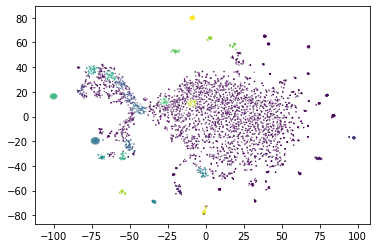

In [58]:
db = DBSCAN(eps=3,min_samples=30)
db.fit(X_transformed)
# print(np.unique(db.labels_,return_counts=True))
plt.scatter(X_transformed[:,0],X_transformed[:,1], s=0.1, c=db.labels_)


# Punjabi

## Nearest Neighbours

In [59]:

datafile = "/content/drive/MyDrive/Colab Notebooks/Filtered PunjabiData (text_only).csv"

data = pd.read_csv(datafile)


data['is_retweet'] = data.full_text.apply(lambda x: x[:2]=='RT')

data=data[data['is_retweet']==False]

corpus = ""
import string

for i in data['full_text']:

  corpus+= " " + preprocess_text(i)

with open("/content/drive/MyDrive/Colab Notebooks/Filtered PunjabiData (text_only).txt",'w') as f:
  f.write(corpus)

In [60]:
model = fasttext.train_unsupervised('/content/drive/MyDrive/Colab Notebooks/Filtered PunjabiData (text_only).txt', model='skipgram')

In [61]:

data = data.reset_index(drop=True)

f = 100
t = AnnoyIndex(f, 'angular') 
for i in range(len(data)):
    v=sentence_vector(model,data['full_text'][i])
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

u = AnnoyIndex(f, 'angular')
u.load('test.ann') 


True

In [62]:
# index = 1
# threshold = 0.2

# neighs,dist = u.get_nns_by_item(index,1000, include_distances=True)
# neighs=data['full_text'][neighs].values

# for i in range(1000):
#   if dist[i]>threshold:
#     break
#   print(i,": __________________________________________________________")
#   print(neighs[i])
#   print("###################################################")
#   print(dist[i])
#   print("______________________________________________________________")

## Visualisation

In [63]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [64]:

X=[]

for i in range(len(data)):
  X.append(sentence_vector(model,data['full_text'][i]))


In [65]:
X_np = np.array(X)
for i in range(100):
  minn = np.min(X_np[:,i])
  X_np[:,i]-=minn
  maxx = np.max(X_np[:,i])
  X_np[:,i]/=maxx

In [66]:
X_transformed = TSNE(n_components=2).fit_transform(X_np)
# print(X_transformed)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40]), array([ 226, 3384,   32,   34,  106,   56,  106,   67,  142,   21,   18,
         21,   10,   20,   28,   33,    7,   32,   32,   11,   14,   39,
         15,   32,   15,   41,   18,   30,   29,   20,   12,   20,   20,
         29,   36,   36,   15,    8,   15,   14,   15,   62]))


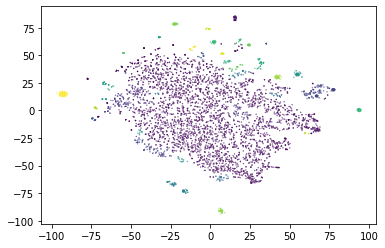

In [67]:
db = DBSCAN(eps=3,min_samples=10)
db.fit(X_transformed)
print(np.unique(db.labels_,return_counts=True))
plt.scatter(X_transformed[:,0],X_transformed[:,1], s=0.1, c=db.labels_)
